In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-data/heart_disease_uci.csv
/kaggle/input/heart-disease/heart_disease_uci.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
df.head(20)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [3]:
print(df.shape)

(920, 16)


we have a 920 person and 16 attribute

In [4]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


id: Unique id for each patient

age:Age of the patient in years

origin: place of study

sex: Male/Female

cp: chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

trestbps: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

chol: serum cholesterol in mg/dl

fbs: if fasting blood sugar > 120 mg/dl

restecg: resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]

thalach: maximum heart rate achieved

exang: exercise-induced angina (True/ False)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by fluoroscopy

thal: [normal; fixed defect; reversible defect]

num: the predicted attribute

In [5]:
df.rename(columns={
    "cp": "chest_pain_type",
    "trestbps": "resting_blood_pressure",
    "chol": "serum_cholesterol",
    "fbs": "fasting_blood_sugar",
    "restecg": "resting_ecg_results",
    "thalch": "max_heart_rate",
    "exang": "exercise_induced_angina",
    "oldpeak": "depression_induced_by_exercise",
    "ca" : "number_of_major_vessels",
    "thal" : "thalassemia",
    "num": "heart_disease"}, inplace=True)
df.head(10)

,id,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,depression_induced_by_exercise,slope,number_of_major_vessels,thalassemia,heart_disease
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [6]:
df.dtypes

id                                  int64
age                                 int64
sex                                object
dataset                            object
chest_pain_type                    object
resting_blood_pressure            float64
serum_cholesterol                 float64
fasting_blood_sugar                object
resting_ecg_results                object
max_heart_rate                    float64
exercise_induced_angina            object
depression_induced_by_exercise    float64
slope                              object
number_of_major_vessels           float64
thalassemia                        object
heart_disease                       int64
dtype: object

In [7]:
df.describe()

,id,age,resting_blood_pressure,serum_cholesterol,max_heart_rate,depression_induced_by_exercise,number_of_major_vessels,heart_disease
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
df.describe(include='object')

,sex,dataset,chest_pain_type,fasting_blood_sugar,resting_ecg_results,exercise_induced_angina,slope,thalassemia
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              920 non-null    int64  
 1   age                             920 non-null    int64  
 2   sex                             920 non-null    object 
 3   dataset                         920 non-null    object 
 4   chest_pain_type                 920 non-null    object 
 5   resting_blood_pressure          861 non-null    float64
 6   serum_cholesterol               890 non-null    float64
 7   fasting_blood_sugar             830 non-null    object 
 8   resting_ecg_results             918 non-null    object 
 9   max_heart_rate                  865 non-null    float64
 10  exercise_induced_angina         865 non-null    object 
 11  depression_induced_by_exercise  858 non-null    float64
 12  slope                           611 

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

id                                  0
age                                 0
sex                                 0
dataset                             0
chest_pain_type                     0
resting_blood_pressure             59
serum_cholesterol                  30
fasting_blood_sugar                90
resting_ecg_results                 2
max_heart_rate                     55
exercise_induced_angina            55
depression_induced_by_exercise     62
slope                             309
number_of_major_vessels           611
thalassemia                       486
heart_disease                       0
dtype: int64

In [12]:
df.drop(['number_of_major_vessels'],inplace=True,axis=1)

In [13]:
df['thalassemia']=df['thalassemia'].fillna(df['thalassemia'].mode()[0])

In [14]:
df['slope']=df['slope'].fillna(df['slope'].mode()[0])

In [15]:
df['depression_induced_by_exercise']=df['depression_induced_by_exercise'].fillna(df['depression_induced_by_exercise'].median())

In [16]:
df=df.dropna(subset=['exercise_induced_angina'])

In [17]:
df['max_heart_rate']=df['max_heart_rate'].fillna(df['max_heart_rate'].median())

In [18]:
df['resting_ecg_results']=df['resting_ecg_results'].fillna(df['resting_ecg_results'].mode()[0])

In [19]:
df['fasting_blood_sugar']=df['fasting_blood_sugar'].fillna(df['fasting_blood_sugar'].mode())

In [20]:
df['exercise_induced_angina']=df['exercise_induced_angina'].fillna(df['exercise_induced_angina'].mode())

/tmp/ipykernel_36/1345133082.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exercise_induced_angina']=df['exercise_induced_angina'].fillna(df['exercise_induced_angina'].mode())


In [21]:
df['serum_cholesterol']=df['serum_cholesterol'].fillna(df['serum_cholesterol'].median())

In [22]:
df['resting_blood_pressure']=df['resting_blood_pressure'].fillna(df['resting_blood_pressure'].median())

In [23]:

df['fasting_blood_sugar']=df['fasting_blood_sugar'].apply(lambda x:1 if x==1 else 0)

In [24]:
df.isnull().sum()

id                                0
age                               0
sex                               0
dataset                           0
chest_pain_type                   0
resting_blood_pressure            0
serum_cholesterol                 0
fasting_blood_sugar               0
resting_ecg_results               0
max_heart_rate                    0
exercise_induced_angina           0
depression_induced_by_exercise    0
slope                             0
thalassemia                       0
heart_disease                     0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              865 non-null    int64  
 1   age                             865 non-null    int64  
 2   sex                             865 non-null    object 
 3   dataset                         865 non-null    object 
 4   chest_pain_type                 865 non-null    object 
 5   resting_blood_pressure          865 non-null    float64
 6   serum_cholesterol               865 non-null    float64
 7   fasting_blood_sugar             865 non-null    int64  
 8   resting_ecg_results             865 non-null    object 
 9   max_heart_rate                  865 non-null    float64
 10  exercise_induced_angina         865 non-null    bool   
 11  depression_induced_by_exercise  865 non-null    float64
 12  slope                           865 non-n

In [26]:
print(df['chest_pain_type'].value_counts())

chest_pain_type
asymptomatic       470
non-anginal        186
atypical angina    167
typical angina      42
Name: count, dtype: int64


In [27]:
print(df['thalassemia'].value_counts())

thalassemia
normal               629
reversable defect    190
fixed defect          46
Name: count, dtype: int64


In [28]:
print(df['slope'].value_counts())

slope
flat           600
upsloping      202
downsloping     63
Name: count, dtype: int64


In [29]:
print(df['exercise_induced_angina'].value_counts())

exercise_induced_angina
False    528
True     337
Name: count, dtype: int64


In [30]:
print(df['resting_ecg_results'].value_counts())

resting_ecg_results
normal              534
lv hypertrophy      181
st-t abnormality    150
Name: count, dtype: int64


In [31]:
print(df['fasting_blood_sugar'].value_counts())

fasting_blood_sugar
0    748
1    117
Name: count, dtype: int64


In [32]:
print(df['sex'].value_counts())

sex
Male      673
Female    192
Name: count, dtype: int64


In [33]:
print(df['dataset'].value_counts())

dataset
Cleveland        304
Hungary          292
VA Long Beach    147
Switzerland      122
Name: count, dtype: int64


In [34]:
print(df['resting_blood_pressure'].value_counts())

resting_blood_pressure
120.0    131
130.0    119
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64


In [35]:
df['max_heart_rate'].value_counts()

max_heart_rate
150.0    43
140.0    41
120.0    35
130.0    30
160.0    26
         ..
195.0     1
91.0      1
87.0      1
192.0     1
73.0      1
Name: count, Length: 119, dtype: int64

In [36]:
print(df['heart_disease'].value_counts())

heart_disease
0    391
1    252
2    102
3     94
4     26
Name: count, dtype: int64


In [37]:
df['serum_cholesterol'].value_counts()

serum_cholesterol
0.0      162
224.0     33
254.0     10
220.0     10
230.0      9
        ... 
360.0      1
328.0      1
129.0      1
468.0      1
333.0      1
Name: count, Length: 210, dtype: int64

162 person with 0mg it doesn't make a sense


In [38]:
df['serum_cholesterol']=df['serum_cholesterol'].replace(0,np.nan)
df['serum_cholesterol']=df['serum_cholesterol'].fillna(df['serum_cholesterol'].median())

the outliers have been treated now

In [39]:
unique2=df[df['serum_cholesterol']>400]
print(unique2)

      id  age     sex        dataset  chest_pain_type  resting_blood_pressure  \
48    49   65  Female      Cleveland      non-anginal                   140.0   
121  122   63  Female      Cleveland     asymptomatic                   150.0   
152  153   67  Female      Cleveland      non-anginal                   115.0   
181  182   56  Female      Cleveland     asymptomatic                   134.0   
373  374   44    Male        Hungary     asymptomatic                   150.0   
434  435   53  Female        Hungary  atypical angina                   113.0   
500  501   40    Male        Hungary     asymptomatic                   120.0   
528  529   32    Male        Hungary     asymptomatic                   118.0   
546  547   54    Male        Hungary     asymptomatic                   130.0   
566  567   52    Male        Hungary     asymptomatic                   140.0   
568  569   53    Male        Hungary      non-anginal                   145.0   
584  585   44    Male       

we leave the big values because they may help us

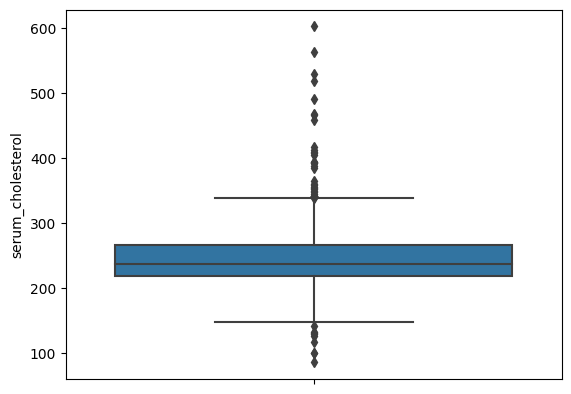

In [40]:
sns.boxplot(y='serum_cholesterol',data=df)
plt.show()

The majority of patients have serum cholesterol levels between 200 and 300 mg/dl. However, we observe outliers with values below 150 mg/dl and above 340 mg/dl

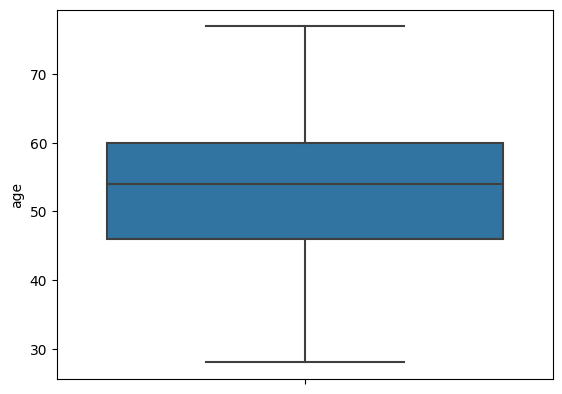

In [41]:
sns.boxplot(y='age',data=df)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


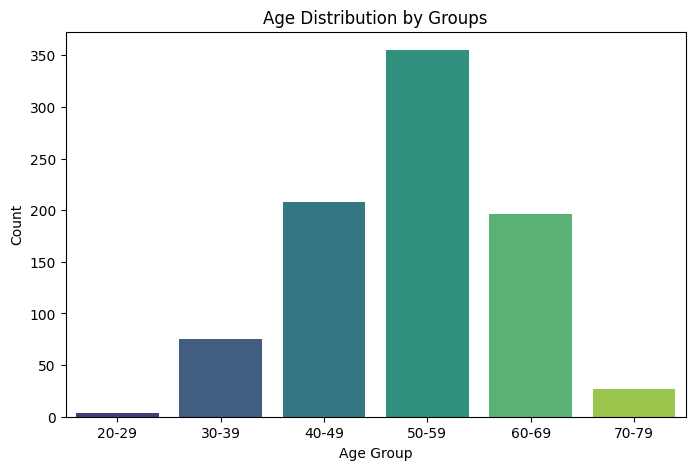

In [42]:
bins = [20, 30, 40, 50, 60, 70, 80]  
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']


df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(8,5))
sns.countplot(x='age_group', data=df, order=labels, palette='viridis')
plt.title('Age Distribution by Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

The majority of patients are seniors between 50 and 59 years old. The youngest group is under 30, while the oldest are above 70. The distribution does not show any significant outliers

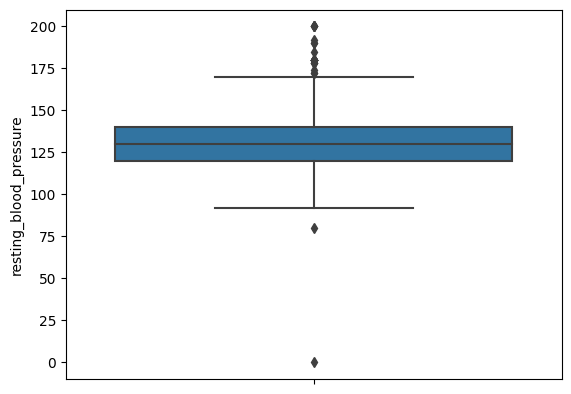

In [43]:
sns.boxplot(y='resting_blood_pressure',data=df)
plt.show()

In [44]:
Q1 = df['resting_blood_pressure'].quantile(0.25)
Q3 = df['resting_blood_pressure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['resting_blood_pressure'] < lower_bound) | (df['resting_blood_pressure'] > upper_bound)]
print(outliers)

      id  age     sex        dataset  chest_pain_type  resting_blood_pressure  \
14    15   52    Male      Cleveland      non-anginal                   172.0   
83    84   68    Male      Cleveland      non-anginal                   180.0   
126  127   56  Female      Cleveland     asymptomatic                   200.0   
172  173   59  Female      Cleveland     asymptomatic                   174.0   
183  184   59    Male      Cleveland   typical angina                   178.0   
188  189   54    Male      Cleveland  atypical angina                   192.0   
201  202   64  Female      Cleveland     asymptomatic                   180.0   
213  214   66  Female      Cleveland     asymptomatic                   178.0   
231  232   55  Female      Cleveland     asymptomatic                   180.0   
338  339   39    Male        Hungary  atypical angina                   190.0   
375  376   45  Female        Hungary  atypical angina                   180.0   
387  388   46    Male       

one person has 0 blood pressure it's not possible

In [45]:
df=df[df['resting_blood_pressure']!=0]

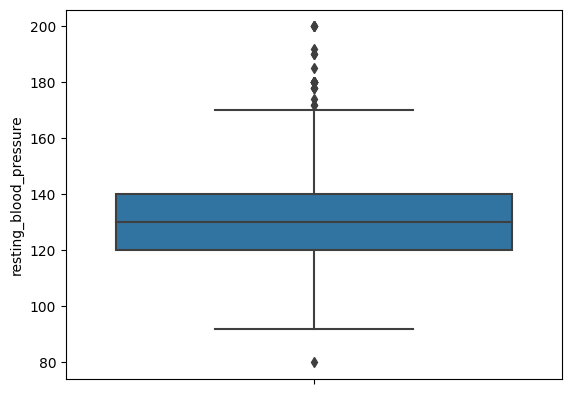

In [46]:
sns.boxplot(y='resting_blood_pressure',data=df)
plt.show()

we treated the outlier here

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


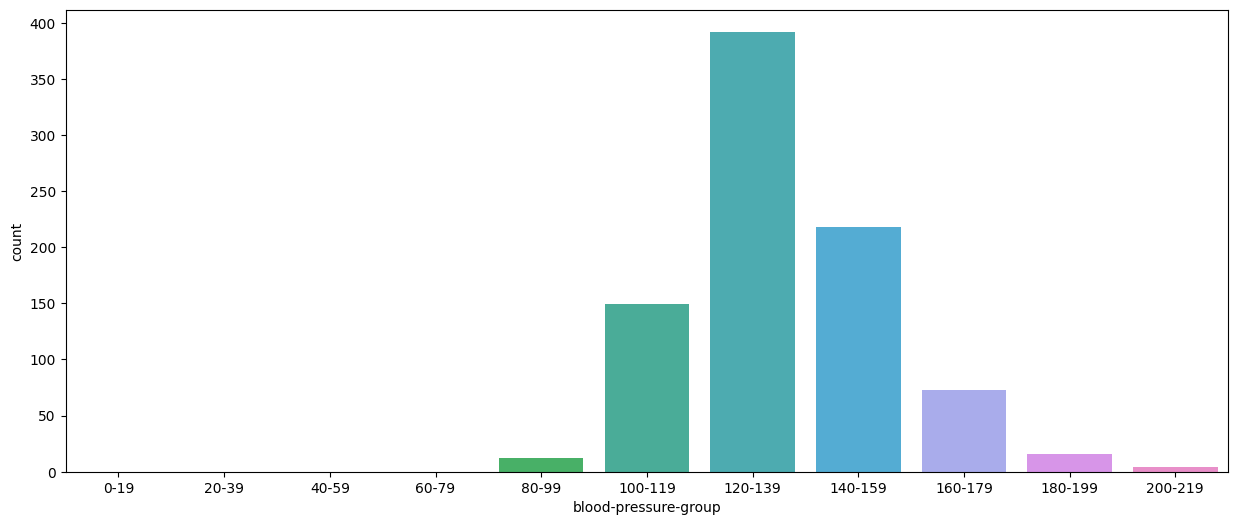

In [47]:
bins=[0,20,40,60,80,100,120,140,160,180,200,220]
labels=['0-19','20-39','40-59','60-79','80-99','100-119','120-139','140-159','160-179','180-199','200-219']
df['blood-pressure-group']=pd.cut(df['resting_blood_pressure'],bins=bins,labels=labels,right=False)
plt.figure(figsize=(15,6)) 
sns.countplot(x='blood-pressure-group',data=df,order=labels)
plt.show()

There are outliers in the resting blood pressure feature because a value of 0 is not physiologically possible. On the other hand, values above 180 mmHg are possible since some individuals can have such high blood pressure. The majority of observations fall between 120 and 139 mmHg, which is within the common range.

we treated the outlier here

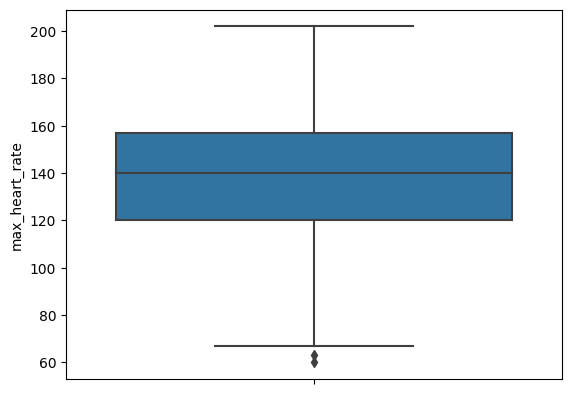

In [48]:
sns.boxplot(y='max_heart_rate',data=df)
plt.show()

The majority of patients have a maximum heart rate between 120 and 160 bpm. The minimum observed value is around 70 bpm, while the maximum exceeds 200 bpm. We can also identify some outliers with values below 70 bpm

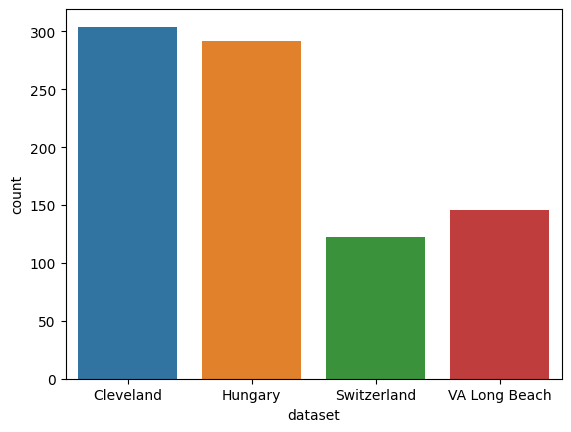

In [49]:
sns.countplot(x='dataset',data=df)
plt.show()

The majority of the data comes from Cleveland, while the least comes from Switzerland

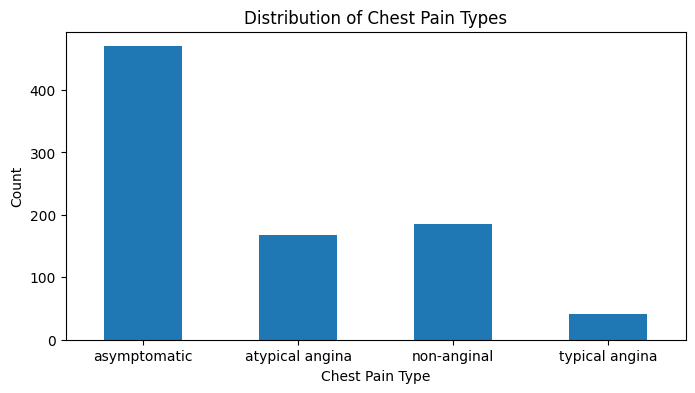

In [50]:
df['chest_pain_type'].value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title("Distribution of Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

The most common chest pain type is asymptomatic, while the least common is typical angina

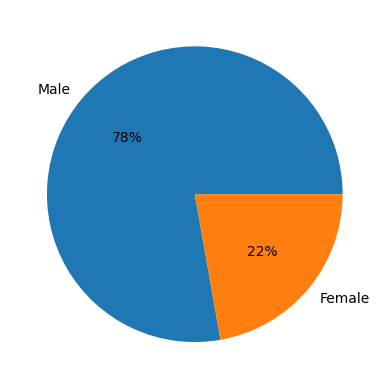

In [51]:
data=df['sex'].value_counts()
plt.pie(data,labels=data.index,autopct='%0.f%%')
plt.show()

Males represent the majority of patients (78%), whereas females make up just 22%

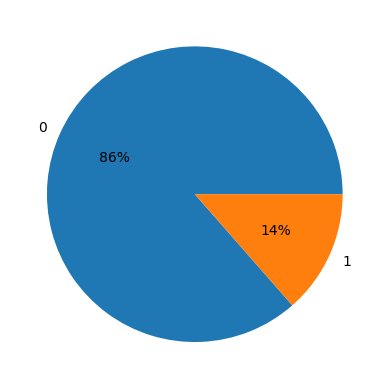

In [52]:
data=df['fasting_blood_sugar'].value_counts()
plt.pie(data,labels=data.index,autopct='%0.f%%')
plt.show()

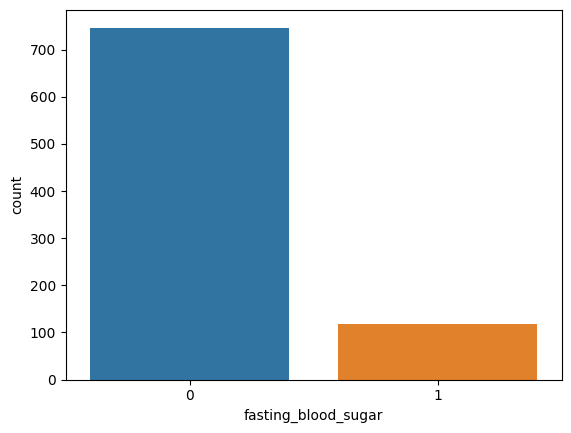

In [53]:
sns.countplot(x='fasting_blood_sugar',data=df)
plt.show()

About 86% of patients (over 700) have a blood sugar level below 120 mg/dl, while only 14% exceed this threshold

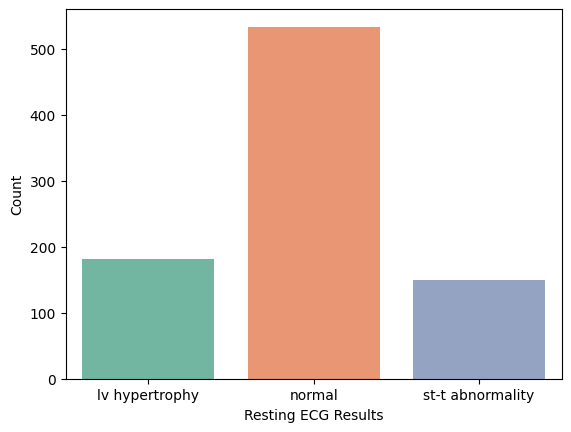

In [57]:
sns.countplot(
    x="resting_ecg_results", 
    data=df, 
    order=df['resting_ecg_results'].value_counts().sort_index().index,
    palette="Set2"
)

plt.xlabel("Resting ECG Results")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

Normal resting ECG results are the most prevalent among patients, whereas left ventricular hypertrophy and ST-T abnormalities appear at comparable but significantly lower rates

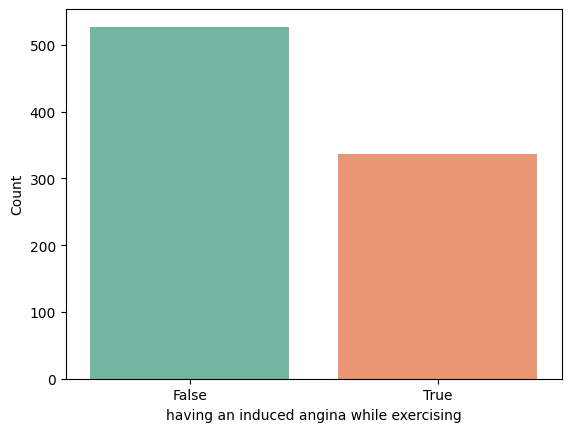

In [59]:
sns.countplot(
    x="exercise_induced_angina", 
    data=df, 
    order=df['exercise_induced_angina'].value_counts().sort_index().index,
    palette="Set2"
)

plt.xlabel("having an induced angina while exercising")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

About 500 patients did not have exercise-induced angina, while around 300 patients did

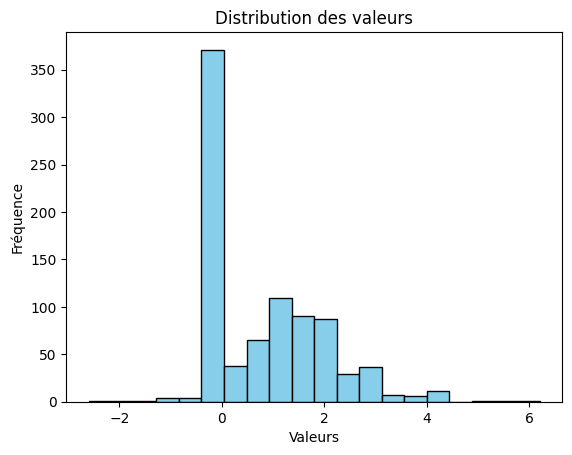

In [60]:
plt.hist(df['depression_induced_by_exercise'], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("values")
plt.ylabel("Frequency")
plt.title("Distribution of values")
plt.show()


In [61]:
df['depression_induced_by_exercise'].value_counts()


depression_induced_by_exercise
 0.0    370
 1.0     83
 2.0     75
 1.5     47
 3.0     28
 0.5     27
 1.2     17
 2.5     16
 1.4     15
 0.8     15
 1.6     14
 0.2     14
 0.6     14
 1.8     12
 0.4     10
 0.1      9
 4.0      8
 2.6      7
 2.8      7
 1.3      5
 2.2      5
 0.7      5
 1.9      5
 0.3      5
 3.6      4
 2.4      4
 1.1      4
 0.9      4
 3.4      3
 1.7      2
-1.0      2
 4.2      2
 2.3      2
 2.1      2
-0.5      2
 3.2      2
 3.5      2
-0.8      1
-0.1      1
-0.9      1
-2.0      1
-0.7      1
-2.6      1
 6.2      1
-1.5      1
-1.1      1
 5.0      1
 4.4      1
 3.8      1
 2.9      1
 5.6      1
 3.1      1
 3.7      1
Name: count, dtype: int64

The majority of patients had no ST depression during the stress test (oldpeak = 0), indicating the absence of ischemic abnormalities. Only a few patients showed high ST depression values above 3, or negative values, which are rare and less clinically common.

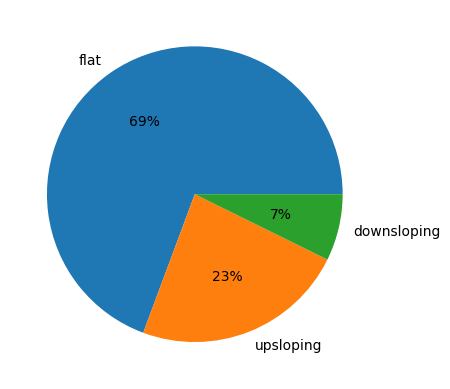

In [62]:
data=df['slope'].value_counts()
plt.pie(data,labels=data.index,autopct='%0.f%%')
plt.show()

Regarding the slope of the peak exercise ST segment, 69% of patients show a flat slope, 23% an upsloping pattern, and only 7% a downsloping one

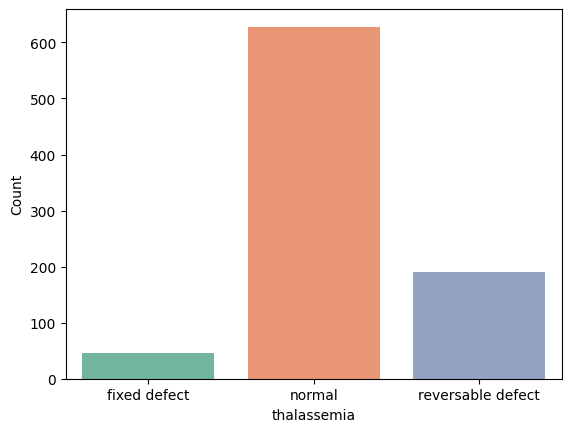

In [63]:
sns.countplot(
    x="thalassemia", 
    data=df, 
    order=df['thalassemia'].value_counts().sort_index().index,
    palette="Set2"
)

plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

About 600 patients present a normal thalassemia result, while reversible defects are less common, and fixed defects are the least frequent

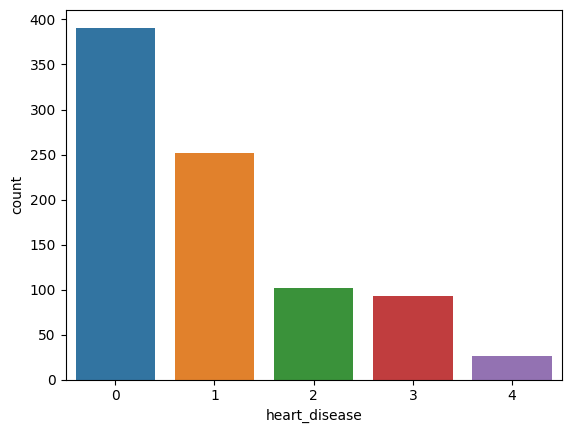

In [64]:
sns.countplot(x='heart_disease',data=df)
plt.show()

The majority of patients show no risk of heart disease, while a predicted attribute of 1 is observed in approximately 250 patients. Attributes 2 and 3 occur less frequently, and 4 is the rarest